# Lancement des commandes SVM light

Relancer le kernel à chaque éxécution de ce fichier

In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
os.chdir(os.getcwd() + "\\SVMlight")  


In [2]:
os.getcwd() + "\\SVMlight"

'C:\\Users\\louis\\Desktop\\Louise\\PLDAC\\SVMlight\\SVMlight'

In [3]:
c_apps = "../BD/apprentissage"
c_tests = "../BD/test"
c_preds = "../BD/prediction"
c_mods = "../BD/modele"
nb_class = 3

In [4]:
shutil.rmtree("../BD/modele")
shutil.rmtree("../BD/prediction")

os.makedirs("../BD/modele")
os.makedirs("../BD/prediction")

In [5]:
def ecriture_fichier_tampon(f_entree,f_sortie, classe):
    """String*String*int
       f_entree : nom du fichier en entrée
       f_sortie : nom du fichier en sortie
       classe : classe que l'on veut apprendre
    Cette fonction ecrit un fichier tampon à partir d'un fichier d'apprentissage ou de test. Pour chaque données de f_entree,
    si le label est égal a classe alors le label devient 1 dans f_sortie sinon il devient -1. """
    
    os.remove(f_sortie)
    fichier = open(f_sortie, "w")
    sortie=""
    with open(f_entree, "r") as f:
        for line in f.readlines():
            if(int(line[0])==classe):
                sortie+="1"+line[1:]
            else:
                sortie+="-1"+line[1:]
        fichier.write(sortie)


In [6]:
# ecriture_fichier_tampon(c_apps+"/apprentissage0.txt","../essaie0.txt",1)

In [7]:
def lancement_apprentissage( c_app, c_mod, classe, option=""):
    """HYP : c_app existe
             c_app est le chemin relatif depuis SVMlight
             c_mod est le chemin relatif depuis SVMlight
       c_app est le chemin du fichier d'apprentissage
       c_mod est le chemin du fichier de sortie de la commande svm_learn : le modèle
       option : option à passer à la commande
       classe : la classe que l'on veut apprendre
       Cette fonction réalise un apprentissage"""
    
    f_tmp="../tmp_app.txt"
    ecriture_fichier_tampon( c_app , f_tmp , classe)
    tmp=os.popen("svm_learn " + option + " " + f_tmp+ " " + c_mod)
    tmp.read()

In [8]:
def lancement_test(c_test, c_mod, c_predict, classe, option=""):
    """HYP : c_test existe
             c_test est le chemin relatif de la base test depuis SVMlight
             c_mod est le chemin relatif du modele depuis SVMlight
             c_predict est le chemin relatif du fichier résultant de la commande svm_classify depuis SVMlight
       option : option à passer à la commande 
       classe : la classe que l'on veut apprendre
       Cette fonction réalise une prédiction"""
    
    f_tmp="../tmp_test.txt"
    ecriture_fichier_tampon(c_test,f_tmp,classe)
    tmp=os.popen("svm_classify " + option + " " + f_tmp + " " + c_mod + " " + c_predict)
    tmp.read()

In [9]:
def evaluation(c_prediction, c_test, classe):
    """HYP : c_prediction est le chemin relatif d'un prédiction depuis SVMlight
             c_test est le chemin relatif d'une base de test correspondant à la prédiction faite depuis SVM
             classe : la classe que l'on veut apprendre
       Cette fonction calcul score d'un modèle"""
    
    f_tmp="../tmp.txt"
    ecriture_fichier_tampon(c_test,f_tmp,classe)
    #tableau de prediction
    p = []
    with open(c_prediction, "r") as f:
        for line in f.readlines():
            if(float(line[:-1]) > 0):
                p.append(1)
            elif(float(line[:-1]) < 0):
                p.append(-1)
            else:
                p.append(0)
    #tableau des labels de test
    lab = []
    with open(f_tmp, "r") as f:
        for line in f.readlines():
            tmp=line[0:2] 
            if(tmp=="\n"): #la dernière ligne lue commence par \n
                lab.append(0)
            else:
                lab.append(int(tmp))     
    #scoring
    scor = 0
    for i in range(len(p)):
        if(p[i]==lab[i]):
            scor += 1
    return scor*1.0/len(p)

In [10]:
def all_lancement(c_tests, c_apps, c_modeles, c_preds, classe, option_a="", option_t=""):
    """HYP : c_tests existe
             c_apps existe
             c_modeles existe
             c_preds existe
             c_tests est le chemin relatif contenant toutes les bases de tests
             c_apps est le chemin relatif contenant toutes les bases d'apprentissage
             classe est la classe que l'on veut apprendre
             c_modeles est le chemin relatif contenant les futurs modèles
             c_preds est le chemin relatif contenant les futurs prédictions
       Cette fonction créé tous les modèles et toutes les prédictions associés à chaque apprentissage et test"""
    
    fichier_app = os.listdir(c_apps)
    fichier_test = os.listdir(c_tests)
    scor_te = []
    scor_tr = []
    for i in range(len(fichier_app)):
        lancement_apprentissage(c_apps + "/" + fichier_app[i], c_modeles + "/modele" + str(i) + ".txt", classe, option_a)
        lancement_test(c_tests + "/" + fichier_test[i], c_modeles + "/modele" + str(i) + ".txt",\
                       c_preds + "/prediction" + str(i) + ".txt", classe, option_t)
        lancement_test(c_apps + "/" + fichier_app[i], c_modeles + "/modele" + str(i) + ".txt", \
                      c_preds + "/prediction_train" + str(i) + ".txt", classe, option_t)
        scor_te.append(evaluation(c_preds + "/prediction" + str(i) + ".txt", c_tests + "/" + fichier_test[i], classe))
        scor_tr.append(evaluation(c_preds + "/prediction_train" + str(i) + ".txt", c_apps + "/" + fichier_app[i], classe))
    return scor_te, scor_tr

In [11]:
def test_all_class(c_tests, c_apps, c_mods, c_preds, nb_class, option_a="",option_t=""):
    """HYP : c_tests existe
             c_apps existe
             c_modeles existe
             c_preds existe
             c_tests est le chemin relatif contenant toutes les bases de tests
             c_apps est le chemin relatif contenant toutes les bases d'apprentissage
             c_modeles est le chemin relatif contenant les futurs modèles
             c_preds est le chemin relatif contenant les futurs prédictions
             option_a option d'apprentissage
        Cette fonction réalise un apprentissage et un test sur toute la base données en fontion de la classe que l'on 
        souhaite apprendre"""
    res_te = []
    res_tr = []
    for i in range(1, nb_class+1):
        s_te, s_tr = all_lancement(c_tests, c_apps, c_mods, c_preds, i, option_a,option_t)
        print("train du label ", i, "score ", s_tr)
        print("test du label ", i, "score ", s_te)
        res_te.append(s_te)
        res_tr.append(s_tr)
    return np.array(res_te), np.array(s_tr)

In [12]:
#test_all_class(c_tests, c_apps, c_mods, c_preds, nb_class)

test avec option -C
plus C est grand plus il y a du sur-apprentissage et inversement

In [13]:
def graph_erreur(c_tests, c_apps, c_mods, c_preds, nb_class,pas, mini, maxi, nom_option_a="", option_k="", option_t=""):
    """trace un graph contenant le score de bonnes prédiction en train et en test en fonction des valeurs de C"""
    res_te = []
    res_tr = []
    c = 0.01
    maxi = c+0.01
    x = []
    while (c<maxi):
        print("\n"+nom_option_a+" "+str(c))
        te, tr = test_all_class(c_tests, c_apps, c_mods, c_preds, nb_class, nom_option_a+" "+str(c)+" "+option_k, option_t)
        te = te.flatten()
        tr = tr.flatten()
        res_te.append(np.mean(te))
        res_tr.append(np.mean(tr))
        x.append(c)
        c = c*pas
    plt.plot(x, res_te, 'r-o', label="test")
    plt.plot(x, res_tr, 'b-o', label="train")
    plt.legend()
    plt.show()
    return np.mean(res_tr), np.mean(res_te)

test de l'option -t qui modifie le kernel utilisé
0 : linéaire	(valeur par défaut)
1 : polynomiale	(s a*b+c)^d
2 : fonction radial basique	exp(-gamma ||a-b||^2)
3 : sinusoïde 	tanh(s a*b+c)


-c 0.01
train du label  1 score  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test du label  1 score  [0.6714285714285714, 0.7142857142857143, 0.6571428571428571, 0.7, 0.5857142857142857, 0.6857142857142857, 0.7142857142857143, 0.6571428571428571, 0.7142857142857143, 0.6285714285714286]
train du label  2 score  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test du label  2 score  [0.5428571428571428, 0.6714285714285714, 0.6, 0.5142857142857142, 0.5714285714285714, 0.6857142857142857, 0.6714285714285714, 0.6857142857142857, 0.5857142857142857, 0.6714285714285714]
train du label  3 score  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test du label  3 score  [0.7428571428571429, 0.8, 0.8142857142857143, 0.8, 0.7285714285714285, 0.8142857142857143, 0.7428571428571429, 0.7857142857142857, 0.8142857142857143, 0.8142857142857143]


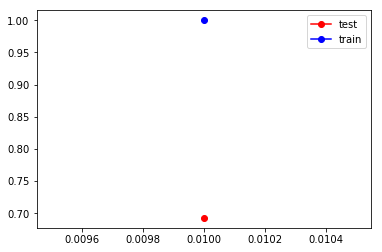

(1.0, 0.69285714285714273)

In [14]:
graph_erreur(c_tests, c_apps, c_mods, c_preds, nb_class, 10, 0.0001, 10000, "-c")


-c 0.01
train du label  1 score  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test du label  1 score  [0.8, 0.8142857142857143, 0.7142857142857143, 0.5857142857142857, 0.6428571428571429, 0.6857142857142857, 0.7714285714285715, 0.6142857142857143, 0.7571428571428571, 0.7714285714285715]
train du label  2 score  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test du label  2 score  [0.6571428571428571, 0.6857142857142857, 0.7285714285714285, 0.7, 0.6714285714285714, 0.7428571428571429, 0.7428571428571429, 0.6571428571428571, 0.7, 0.6857142857142857]
train du label  3 score  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test du label  3 score  [0.8142857142857143, 0.7857142857142857, 0.9, 0.8857142857142857, 0.8857142857142857, 0.8714285714285714, 0.7428571428571429, 0.9, 0.9, 0.8571428571428571]


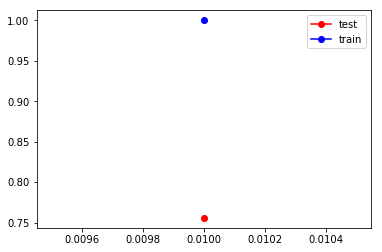

(1.0, 0.75571428571428556)

In [15]:
graph_erreur(c_tests, c_apps, c_mods, c_preds, nb_class, 10, 0.0001, 10000, "-c", "-t 1")


-c 0.01
train du label  1 score  [0.6428571428571429, 0.6412698412698413, 0.6396825396825396, 0.6523809523809524, 0.6476190476190476, 0.6412698412698413, 0.6428571428571429, 0.6365079365079365, 0.6492063492063492, 0.6492063492063492]
test du label  1 score  [0.6571428571428571, 0.6714285714285714, 0.6857142857142857, 0.5714285714285714, 0.6142857142857143, 0.6714285714285714, 0.6571428571428571, 0.7142857142857143, 0.6, 0.6]
train du label  2 score  [0.6904761904761905, 0.692063492063492, 0.6968253968253968, 0.6873015873015873, 0.6904761904761905, 0.7015873015873015, 0.6952380952380952, 0.7095238095238096, 0.6825396825396826, 0.6968253968253968]
test du label  2 score  [0.7285714285714285, 0.7142857142857143, 0.6714285714285714, 0.7571428571428571, 0.7285714285714285, 0.6285714285714286, 0.6857142857142857, 0.5571428571428572, 0.8, 0.6714285714285714]
train du label  3 score  [0.6666666666666666, 0.6666666666666666, 0.6634920634920635, 0.6603174603174603, 0.6619047619047619, 0.6571428

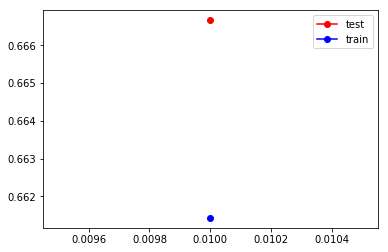

(0.66142857142857148, 0.66666666666666663)

In [14]:
graph_erreur(c_tests, c_apps, c_mods, c_preds, nb_class, 10,  0.0001, 200, "-c", "-t 2")


-c 0.01
train du label  1 score  [0.6428571428571429, 0.6412698412698413, 0.6396825396825396, 0.6523809523809524, 0.6476190476190476, 0.6412698412698413, 0.6428571428571429, 0.6365079365079365, 0.6492063492063492, 0.6492063492063492]
test du label  1 score  [0.6571428571428571, 0.6714285714285714, 0.6857142857142857, 0.5714285714285714, 0.6142857142857143, 0.6714285714285714, 0.6571428571428571, 0.7142857142857143, 0.6, 0.6]
train du label  2 score  [0.6904761904761905, 0.692063492063492, 0.6968253968253968, 0.6873015873015873, 0.6904761904761905, 0.7015873015873015, 0.6952380952380952, 0.7095238095238096, 0.6825396825396826, 0.6968253968253968]
test du label  2 score  [0.7285714285714285, 0.7142857142857143, 0.6714285714285714, 0.7571428571428571, 0.7285714285714285, 0.6285714285714286, 0.6857142857142857, 0.5571428571428572, 0.8, 0.6714285714285714]
train du label  3 score  [0.6666666666666666, 0.6666666666666666, 0.6634920634920635, 0.6603174603174603, 0.6619047619047619, 0.6571428

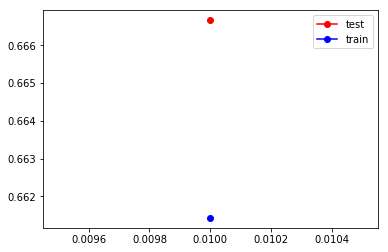

(0.66142857142857148, 0.66666666666666663)

In [15]:
graph_erreur(c_tests, c_apps, c_mods, c_preds, nb_class, 10,  0.0001, 10000, "-c", "-t 3")